In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv(r'F:\Manipal -DS Course\Raw Data\Datasets\breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y_sample = pd.get_dummies(df['diagnosis'], drop_first=True)
#y = y.values
data_sample = df.drop(['id','diagnosis'], axis=1)
data_sample.shape

(569, 30)

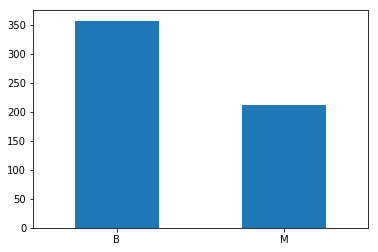

In [5]:
# Counts on Target Variable:
import matplotlib.pyplot as plt
count = df['diagnosis'].value_counts()
#count = pd.value_counts(y.values.flatten())
count.plot(kind='bar', rot=0)
plt.xticks(range(2), ['B','M'])
plt.show()

In [12]:
# Over_Sampling Technique:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(sampling_strategy=1.0, random_state=42)
x_res, y_res = smote.fit_sample(data_sample, y_sample)

# Input and Output Variables:
y = y_res
data = x_res

In [13]:
sc = StandardScaler()
data_norm = sc.fit_transform(data)
data_norm = pd.DataFrame(data_norm, columns=data_sample.columns)
data_norm.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.871997,-2.234031,1.035173,0.765518,1.578551,3.218567,2.496040,2.292241,2.237231,2.385837,...,1.617981,-1.518607,2.023739,1.732426,1.251725,2.549821,1.979317,2.086006,2.631415,1.932716
1,1.571268,-0.459264,1.432143,1.642041,-0.942895,-0.620777,-0.174951,0.359580,-0.060789,-0.883383,...,1.540874,-0.490214,1.287746,1.627174,-0.478638,-0.567374,-0.299646,0.891797,-0.339288,0.231952


In [15]:
# Train-Test:
xtrain, xtest, ytrain, ytest = train_test_split(data_norm, y, test_size=0.2, random_state=10)

In [16]:
# ANN Architecture:
ann_class = Sequential()
ann_class.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu', input_dim=30)) #Input Layer
ann_class.add(Dropout(0.3))
ann_class.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu')) #Hidden Layers
ann_class.add(Dropout(0.3))
ann_class.add(Dense(units=8, kernel_initializer='he_uniform', activation='relu'))#Hidden Layers
ann_class.add(Dropout(0.2))
ann_class.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid')) #Output Layer

ann_class.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_class.fit(xtrain, ytrain, validation_split=0.1, batch_size=16, epochs=100)

Train on 500 samples, validate on 56 samples
Epoch 1/100
500/500 [==============================] - 0s 626us/step - loss: 0.7069 - accuracy: 0.6000 - val_loss: 0.4360 - val_accuracy: 0.8393
Epoch 2/100
500/500 [==============================] - 0s 128us/step - loss: 0.4565 - accuracy: 0.7720 - val_loss: 0.3156 - val_accuracy: 0.8571
Epoch 3/100
500/500 [==============================] - 0s 136us/step - loss: 0.3011 - accuracy: 0.8600 - val_loss: 0.2454 - val_accuracy: 0.8571
Epoch 4/100
500/500 [==============================] - 0s 124us/step - loss: 0.2479 - accuracy: 0.8840 - val_loss: 0.2093 - val_accuracy: 0.8750
Epoch 5/100
500/500 [==============================] - 0s 130us/step - loss: 0.2401 - accuracy: 0.8980 - val_loss: 0.1813 - val_accuracy: 0.9107
Epoch 6/100
500/500 [==============================] - 0s 110us/step - loss: 0.2109 - accuracy: 0.9280 - val_loss: 0.1520 - val_accuracy: 0.9286
Epoch 7/100
500/500 [==============================] - 0s 106us/step - loss: 0.2056 -

Epoch 57/100
500/500 [==============================] - 0s 104us/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.1519 - val_accuracy: 0.9643
Epoch 58/100
500/500 [==============================] - 0s 104us/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.1466 - val_accuracy: 0.9643
Epoch 59/100
500/500 [==============================] - 0s 96us/step - loss: 0.0210 - accuracy: 0.9940 - val_loss: 0.1282 - val_accuracy: 0.9821
Epoch 60/100
500/500 [==============================] - 0s 98us/step - loss: 0.0181 - accuracy: 0.9960 - val_loss: 0.1301 - val_accuracy: 0.9821
Epoch 61/100
500/500 [==============================] - 0s 96us/step - loss: 0.0252 - accuracy: 0.9860 - val_loss: 0.1092 - val_accuracy: 0.9821
Epoch 62/100
500/500 [==============================] - 0s 106us/step - loss: 0.0434 - accuracy: 0.9900 - val_loss: 0.1206 - val_accuracy: 0.9821
Epoch 63/100
500/500 [==============================] - 0s 104us/step - loss: 0.0263 - accuracy: 0.9960 - val_loss: 0.1434 - va

In [17]:
# Prediction:
ypred = ann_class.predict(xtest)
ypred_new = ypred > 0.5

In [18]:
# Accuaracy:
print(accuracy_score(ytest, ypred_new)*100)

98.57142857142858


In [38]:
# Confusion Matrix:
print(confusion_matrix(ytest, ypred_new))
print('Sensitivity =' ,(76/(76+0))*100)
print('Specificity =' ,(62/(62+2))*100)

[[62  2]
 [ 0 76]]
Sensitivity = 100.0
Specificity = 96.875
